In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import rcParams
import seaborn as sns


sns.set()
%matplotlib inline

In [2]:
bom_movie_gross = pd.read_csv("bom.movie_gross.csv.gz")
imdb_name_basics = pd.read_csv("imdb.name.basics.csv.gz")
imdb_title_akas = pd.read_csv("imdb.title.akas.csv.gz")
imdb_title_basics = pd.read_csv("imdb.title.basics.csv.gz")
imdb_title_crew = pd.read_csv("imdb.title.crew.csv.gz")
imdb_title_principals = pd.read_csv('imdb.title.principals.csv.gz')
imdb_title_principals.head()
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
rt_movie_info = pd.read_csv('rt.movie_info.tsv.gz',delimiter='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
df_movie_budgets = tn_movie_budgets.copy()

In [3]:
# Converting money categories from string to integers

gross = pd.to_numeric(tn_movie_budgets.worldwide_gross.str.replace('$','').str.replace(',',''))

budget = pd.to_numeric(tn_movie_budgets.production_budget.str.replace('$','').str.replace(',',''))

domestic_gross = pd.to_numeric(tn_movie_budgets.domestic_gross.str.replace('$','').str.replace(',',''))

# Reassigning the columns in the df to be integers and making an ROI column

tn_movie_budgets['worldwide_gross'] = gross
tn_movie_budgets['production_budget'] = budget
tn_movie_budgets['domestic_gross'] = domestic_gross

# Creating ROI and it's column
roi = (gross - budget)/budget
tn_movie_budgets['roi'] = roi
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696


In [4]:
# Checking out the highest ROI
roi.sort_values(ascending=False); # Highest ROI index is 5745

In [5]:
# What movie is the highest ROI?
tn_movie_budgets.iloc[5745]
# It's porn. With a name like Microsoft, porn might not be our forte.

id                             46
release_date         Jun 30, 1972
movie                 Deep Throat
production_budget           25000
domestic_gross           45000000
worldwide_gross          45000000
roi                          1799
Name: 5745, dtype: object

In [6]:
# Next highest:
roi.sort_values(ascending=False) # Index 5613
tn_movie_budgets.iloc[5613]; # Mad Max. Ok. ROI of Mad Max was 497.75

In [7]:
# Grab the movies from the data frame between the years 2010 and 2018
# First, start get a mask to filter the df later
mask = (pd.to_datetime(tn_movie_budgets.release_date) >= '2010-01-01') &\
        (pd.to_datetime(tn_movie_budgets.release_date) < '2019-01-01')

In [8]:
# Filtering by date:
tn_movie_budgets_to_date = tn_movie_budgets[mask]

In [9]:
tn_movie_budgets_to_date.shape#.sort_values('roi', ascending=False)

(2124, 7)

In [10]:
# Now we want to join this data frame to another dataframe with genre info
# Setting the index of each to movies and joining on the index   
tn_movie_budgets_to_date.index = tn_movie_budgets_to_date['movie']
imdb_title_basics.index = imdb_title_basics['primary_title']

In [11]:
# making a the data frame that has all the info we are interested in
the_df = tn_movie_budgets_to_date.join(imdb_title_basics, how = 'inner')
the_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
#Horror,16,"Nov 20, 2015",#Horror,1500000,0,0,-1.000000,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror"
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Strong,64,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,1.031954,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"


In [12]:
# Any ROI with the value -1 is likely missing data. Writing a loop to replace this with nan
for index, element in enumerate(the_df['roi']):
    if (element < -0.9999999) & (element > -1.01):
        the_df['roi'][index] = np.nan
        

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
the_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
#Horror,16,"Nov 20, 2015",#Horror,1500000,0,0,NaN,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror"
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Strong,64,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,1.031954,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"


In [14]:
# Dropping rows with any nan values
the_df.dropna(inplace=True)
the_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Strong,64,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,1.031954,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
127 Hours,6,"Nov 5, 2010",127 Hours,18000000,18335230,60217171,2.345398,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama"


In [15]:
# Sort genres by median ROI
test_median = the_df.groupby('genres').roi.median().sort_values(ascending = False)
test_median.head()

# Top 5 genres are below

genres
Comedy,Romance,Sport       27.807633
Horror,Romance,Thriller    26.179241
Horror,Mystery,Thriller    14.900007
Adventure,Horror           11.931420
Biography,Drama,Fantasy    11.679440
Name: roi, dtype: float64

In [16]:
# Sample size is of concern. We want to drop any genre with less than 10 movies
# Counting the number of movies in each genre
test_count = the_df.groupby('genres').roi.count().sort_values(ascending = False)

count_df = pd.DataFrame(test_count)
median_df = pd.DataFrame(test_median)

joined_genre_df = median_df.join(count_df, how ='inner', lsuffix='median', rsuffix = 'count')

In [17]:
# Ok, sort by genre by count
joined_genre_df.sort_values(by='roicount', ascending=False) 

# Only keep genres that have more than 10 movies
good_genres = joined_genre_df[joined_genre_df['roicount'] >= 10]
good_genres = good_genres.sort_values(by = 'roimedian', ascending = False)
good_genres.head()
# These are our new top 5 genres by median ROI

,roimedian,roicount
genres,,
"Horror,Mystery,Thriller",14.900007,33
"Drama,Horror,Thriller",3.570256,11
"Action,Adventure,Animation",2.697137,15
"Action,Adventure,Comedy",2.658676,23
"Action,Sci-Fi,Thriller",2.649604,10


In [18]:
# Making a list of good genres to use
list_of_good_genres = list(good_genres.index)
list_of_good_genres

['Horror,Mystery,Thriller',
 'Drama,Horror,Thriller',
 'Action,Adventure,Animation',
 'Action,Adventure,Comedy',
 'Action,Sci-Fi,Thriller',
 'Action,Adventure,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Comedy,Romance',
 'Drama,Horror,Mystery',
 'Action,Adventure,Thriller',
 'Action,Thriller',
 'Comedy,Drama,Music',
 'Biography,Drama,History',
 'Comedy,Drama,Romance',
 'Adventure,Comedy,Family',
 'Horror',
 'Adventure,Family,Fantasy',
 'Action,Drama,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Biography,Comedy,Drama',
 'Comedy,Drama',
 'Adventure,Comedy,Drama',
 'Action,Comedy,Crime',
 'Biography,Documentary',
 'Drama,Fantasy,Horror',
 'Biography,Drama',
 'Horror,Thriller',
 'Drama,Romance',
 'Comedy',
 'Comedy,Crime,Drama',
 'Action,Crime,Thriller',
 'Biography,Drama,Sport',
 'Action,Adventure,Drama',
 'Action,Drama,Thriller',
 'Drama,Mystery,Thriller',
 'Crime,Drama',
 'Biography,Crime,Drama',
 'Documentary',
 'Action,Crime,Drama',
 'Drama,Music',
 'Thriller',
 'Drama,Thriller',
 'Drama',
 

In [19]:
the_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Strong,64,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,1.031954,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
127 Hours,6,"Nov 5, 2010",127 Hours,18000000,18335230,60217171,2.345398,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama"


In [20]:
# Select these genres out of our data frame
index_list = []
for index, element in enumerate(the_df['genres']):
    if element in list_of_good_genres:
        index_list.append(index)

In [21]:
good_sample_df = the_df.iloc[index_list,:]

In [22]:
good_sample_df.head() # This is our data frame that has the desired sample size and no nan values.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
13 Sins,51,"Apr 18, 2014",13 Sins,4000000,9134,47552,-0.988112,tt2059171,13 Sins,13 Sins,2014,93.0,"Horror,Thriller"
2 Guns,39,"Aug 2, 2013",2 Guns,61000000,75612460,132493015,1.172017,tt1272878,2 Guns,2 Guns,2013,109.0,"Action,Comedy,Crime"


In [23]:
# Dealing with duplicate movies
good_sample_df.index.duplicated().sum()
# There are 309 duplications

309

In [24]:
# Getting rid of duplicates
good_sample_df2 = good_sample_df.copy() # Backup copy just in case
good_sample_df2.drop_duplicates(subset='movie', keep='first',inplace = True)

In [25]:
good_sample_df2.head(50) # Good. Worked.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
13 Sins,51,"Apr 18, 2014",13 Sins,4000000,9134,47552,-0.988112,tt2059171,13 Sins,13 Sins,2014,93.0,"Horror,Thriller"
2 Guns,39,"Aug 2, 2013",2 Guns,61000000,75612460,132493015,1.172017,tt1272878,2 Guns,2 Guns,2013,109.0,"Action,Comedy,Crime"
21 Jump Street,44,"Mar 16, 2012",21 Jump Street,42000000,138447667,202812429,3.828867,tt1232829,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime"
22 Jump Street,85,"Jun 13, 2014",22 Jump Street,50000000,191719337,331333876,5.626678,tt2294449,22 Jump Street,22 Jump Street,2014,112.0,"Action,Comedy,Crime"
3,85,"Sep 16, 2011",3,7200000,59774,295492,-0.958959,tt1517177,3,3,2010,119.0,"Comedy,Drama,Romance"
3 Backyards,51,"Mar 11, 2011",3 Backyards,300000,39475,39475,-0.868417,tt1314190,3 Backyards,3 Backyards,2010,88.0,Drama
3 Days to Kill,64,"Feb 21, 2014",3 Days to Kill,28000000,30697999,38959900,0.391425,tt2172934,3 Days to Kill,3 Days to Kill,2014,117.0,"Action,Drama,Thriller"


In [26]:
# Dropping duplicate columns
good_sample_df2.drop(columns=['movie', 'primary_title', 'original_title'],inplace = True)

In [27]:
genre_df = good_sample_df2.copy()
movies_df = good_sample_df2.copy()


# The dataframe is ready

In [28]:
## Adding dataframe coded for scatterplot roi to budget to profit comparison
#####Joe's edits#######
#similar date filter for df_movie_budgets for the roi/budget/profit scatterplot, built on same code, copy df created to avoid conflict if variable names changed
mask = (pd.to_datetime(df_movie_budgets.release_date) >= '2010-01-01') & (pd.to_datetime(df_movie_budgets.release_date) < '2019-01-01')
df_movie_budgets_clip = df_movie_budgets[mask]

df_movie_budgets_clip['worldwide_gross_numeric'] = pd.to_numeric(df_movie_budgets_clip.worldwide_gross.str.replace('$','').str.replace(',',''))
df_movie_budgets_clip['budget_numeric'] = pd.to_numeric(df_movie_budgets_clip.production_budget.str.replace('$','').str.replace(',',''))
df_movie_budgets_clip['profit'] = df_movie_budgets_clip['worldwide_gross_numeric'] - df_movie_budgets_clip['budget_numeric']

df_movie_budgets_clip.rename({'id':'movie'}, inplace = True)

df_movie_budgets_clip['roi'] = df_movie_budgets_clip['profit']/df_movie_budgets_clip['budget_numeric']
df_movie_budgets_clip.join(imdb_name_basics, how = 'inner')
df_movie_budgets_clip.set_index('movie', inplace=True)
df_movie_budgets_clip['roi'].sort_values(ascending=False)
imdb_title_basics.set_index('primary_title', inplace = True)
## Create the_df which is where ROI/Budget/Profit pulls from
a_df = df_movie_budgets_clip.join(imdb_title_basics, how = 'inner')
a_df = a_df.loc[~a_df.index.duplicated(keep='first')]

##  Create subdataframes for ROI/Budget/Profit plot (plot dataframe is gross_roi_max_df) and then combines them into gross_roi_max_df

top_5_budget = a_df.sort_values(by = 'budget_numeric', ascending = False, axis = 0).iloc[:10,:]
top_5_budget['top_X_parameter'] = 'budget'
top_5_profit = a_df.sort_values(by = 'profit', ascending = False, axis = 0).iloc[:10,:]
top_5_profit['top_X_parameter'] = 'gross'
top_5_roi = a_df.sort_values(by = 'roi', ascending = False, axis = 0).iloc[:10,:]
top_5_roi['top_X_parameter'] = 'roi'
## Stack the dataframes
transition1_df = top_5_budget.append(top_5_profit)
gross_roi_max_df = transition1_df.append(top_5_roi)
gross_roi_max_df = gross_roi_max_df.reset_index()

## Creating indicator column for films that made money vs those that did not - will use for hue parameter in plot below
gross_roi_max_df['made_a_profit'] = 1
for row in range(0,gross_roi_max_df.shape[0]):
    if gross_roi_max_df.profit[row] > 0:
        gross_roi_max_df.made_a_profit[row] = 1
    else:
        gross_roi_max_df.made_a_profit[row] = 0
## rename column 'index' as title 
gross_roi_max_df.rename(columns = {'index':'title'}, inplace = True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

# Introduction

We wanted to find out which types of genres are most likely to be successful with the data we have. To do so we wanted to make a couple of metrics on which we could quantify the "best" genres by. The first metric we used is the return on investment (ROI). This is defined as the profit divided by the money spent making the film (aka budget). To use this metric, we calculated every ROI for every individual movie and looked at its distribustion by genre. 

The second metric we used is the Benefit-to-Risk ratio. It is an arbitrary parameter we created to measure the performance of a genre and is defined below. This metric was created because it penalizes movies for having any distribution in the negative ROI and rewards genres with movies in the positive ROI, which allows for discrimination between "bad" and "good" genres.


$\huge{\mathrm{Definition}\ \mathrm{of}\ \mathrm{ROI}}$
$$$$ $$$$
$$\mathrm{Return}\ \mathrm{on}\ \mathrm{Investment} = \frac{\mathrm{Profit}}{\mathrm{Budget}}$$ $$$$
$$\mathrm{where}$$ $$$$
 $\mathrm{ profit} = (\mathrm{world\ wide\ gross} - \mathrm{the\ budget})$

# Why ROI?

Its important to think of movie success not just in terms of gross revenue and profit but in terms of ROI.

For example, justice league made ~ 325 million which sounds great until you realize it cost 300 million to make (ROI = 1.083. Compare this to Paranormal Activity 2, it brought in $177 million but cost only 3 million to make (ROI=59). The cheap film that brought in less money was in fact a much more efficient use of money.

High ROI films do not have to be, and usually are not the high budget blockbuster films.

Note from the graph the high ROI values are not blockbusters, studios are getting best return on investment on small budget flicks (largely horror films) in the lower left corner.
*may need to run cell below twice to get graph to plot properly

##### The graph below plots movies in budget, profit, and ROI. ROI is indicated by the size of the circle, and budget and profit are on the x and y scales respectively.  
## You may need to run cell below twice to get graph to plot properly - this is a kink we're still working out

/usr/local/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


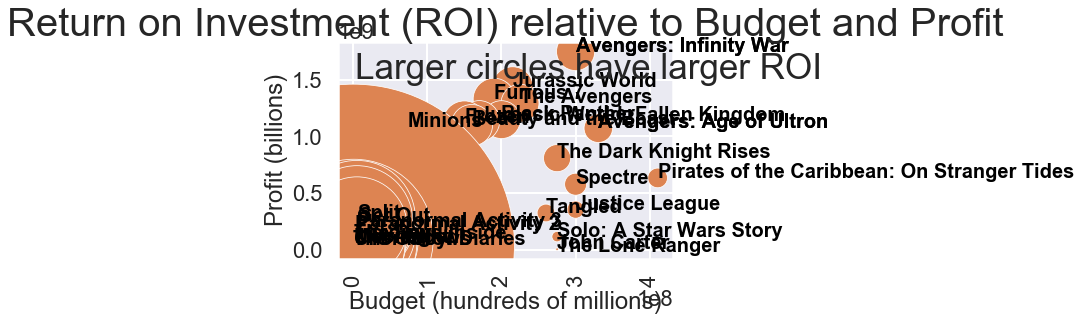

In [29]:
sns.set()
sns.set_context('poster')
ax1=sns.scatterplot(data=gross_roi_max_df, x='budget_numeric', y='profit', s=gross_roi_max_df['roi']*250, hue='made_a_profit')
rcParams['figure.figsize'] = (20, 14)
ax1.set_xlabel('Budget (hundreds of millions)')
ax1.set_ylabel('Profit (billions)')
plt.xticks(rotation=90) 
ax1.set_title('Return on Investment (ROI) relative to Budget and Profit', fontsize = 40)
ax1.get_legend().remove()

for line in range(0,gross_roi_max_df.shape[0]):
     ax1.text(gross_roi_max_df.budget_numeric[line]+0.2, gross_roi_max_df.profit[line], gross_roi_max_df.title[line], horizontalalignment='left', size='small', color='black', weight='semibold')

ax1.text(0.05, 0.95, s = 'Larger circles have larger ROI', transform=ax1.transAxes, fontsize=35, verticalalignment='top')
plt.savefig('roi_v_budget_v_profit.png')
plt.show()


 $$$$

$\huge{\mathrm{Benefit\ to\ Risk\ Ratio}}$$$$$
$$$$
\begin{equation} Benefit-To-Risk = \frac{Benefit}{Risk} \end{equation} $$$$
$$$$

where benefit is defined as the median ROI for a genre of movies and Risk is defined as ratio of films that lost money over 
the total number of films for a genre.




In [30]:
# First, finding benefit
benefit = genre_df.groupby('genres').median()['roi'] 


In [31]:
# Now finding risk
total_genre_count = genre_df['genres'].value_counts() # Good
total_genre_count_and_one = total_genre_count + 1 #Good # Adding 1 to avoid divsion by zero 
                                                #(incase a certain genre did not lose money)


#Action,Adventure,Sci-Fi and Action,Adventure,Thriller have no failed profits. Scaling all movies up by 1.
failed_in_genre_count = genre_df[genre_df['roi']<0].groupby('genres').count()['roi'] + 1
failed_in_genre_count['Action,Adventure,Sci-Fi'] = 1
failed_in_genre_count['Action,Adventure,Thriller'] = 1


risk = np.array(failed_in_genre_count)/np.array(total_genre_count_and_one )




In [32]:
# now we have our Benefit-to-risk ratio
b2r = benefit/risk
b2r

genres
Action,Adventure,Animation    110.582606
Action,Adventure,Comedy        30.001365
Action,Adventure,Drama          3.772566
Action,Adventure,Fantasy       14.296041
Action,Adventure,Sci-Fi        17.253396
Action,Adventure,Thriller       5.627188
Action,Comedy,Crime             4.354347
Action,Crime,Drama             13.622374
Action,Crime,Thriller           7.008401
Action,Drama,Sci-Fi            31.822165
Action,Drama,Thriller           5.351135
Action,Sci-Fi,Thriller         42.276235
Action,Thriller                24.153735
Adventure,Animation,Comedy     26.948957
Adventure,Comedy,Drama         13.831059
Adventure,Comedy,Family         5.930294
Adventure,Family,Fantasy        4.621385
Biography,Comedy,Drama         15.193387
Biography,Crime,Drama           1.136026
Biography,Documentary           6.480223
Biography,Drama                 3.313452
Biography,Drama,History         1.590866
Biography,Drama,Sport           0.268967
Comedy                          0.651227
Comedy,Cr

In [33]:
# First, find benefit (median ROI)
median_roi = movies_df.groupby('genres').median()['roi'].to_frame()
median_roi.columns = ['median_roi']

# Now count the number of losers in each genre, if zero won't have a row for that genre
losers = movies_df[movies_df['roi']<0].groupby('genres').count()['roi'].to_frame()
losers.columns = ['losers']

total = movies_df.groupby('genres').count()['roi'].to_frame()
total.columns = ['total']

genres_df = median_roi.join(total, how = 'outer').join(losers, how='left').fillna(0)



# Now find the adjusted risk (losers + 1)/(total + 1) and BtoR
genres_df['adjusted_risk'] = (genres_df.losers + 1)/(genres_df.total + 1)
genres_df['BtoR'] = genres_df.median_roi/genres_df.adjusted_risk
genres_df.sort_values('BtoR', ascending=False)

,median_roi,total,losers,adjusted_risk,BtoR
genres,,,,,
"Horror,Mystery,Thriller",16.484765,28,2.0,0.103448,159.352726
"Action,Adventure,Sci-Fi",2.556059,50,0.0,0.019608,130.358992
"Adventure,Animation,Comedy",1.996219,64,2.0,0.046154,43.251413
"Drama,Horror,Thriller",5.377029,8,1.0,0.222222,24.196631
"Action,Adventure,Thriller",1.765392,12,0.0,0.076923,22.950100
"Action,Adventure,Animation",2.697137,15,1.0,0.125000,21.577094
"Action,Sci-Fi,Thriller",4.091249,9,2.0,0.300000,13.637495
"Action,Drama,Sci-Fi",2.386662,8,1.0,0.222222,10.739981
"Action,Adventure,Comedy",2.769357,22,5.0,0.260870,10.615868


In [34]:
# Get genres with small sample sizes
genres_to_drop = genres_df[genres_df['total']<10]
genres_to_drop

,median_roi,total,losers,adjusted_risk,BtoR
genres,,,,,
"Action,Drama,Sci-Fi",2.386662,8,1.0,0.222222,10.739981
"Action,Sci-Fi,Thriller",4.091249,9,2.0,0.300000,13.637495
"Biography,Documentary",1.690493,4,1.0,0.400000,4.226232
"Comedy,Drama,Music",1.624576,9,1.0,0.200000,8.122882
"Drama,Fantasy,Horror",0.413520,9,3.0,0.400000,1.033800
"Drama,Horror,Thriller",5.377029,8,1.0,0.222222,24.196631
"Drama,Sport",0.150938,8,3.0,0.444444,0.339611
Thriller,-0.155696,4,2.0,0.600000,-0.259494


In [35]:
# Drop movies from genres with small samples
bigsample_movies = movies_df.copy()
print(len(bigsample_movies))
bigsample_movies['title'] = bigsample_movies.index
bigsample_movies.set_index('genres', inplace=True, drop = False)
bigsample_movies.drop(genres_to_drop.index, axis= 0, inplace=True)
bigsample_movies.set_index('title', inplace=True)
print(len(bigsample_movies))

# Drop genres with small samples
bigsample_genres = genres_df.copy()
print(len(bigsample_genres))
bigsample_genres.drop(genres_to_drop.index, inplace=True)
print(len(bigsample_genres))

#rank the genres by BtoR
ranked_genres = list(bigsample_genres.sort_values('BtoR', ascending=False).index)
ranked_genres

1108
1049
46
38


['Horror,Mystery,Thriller',
 'Action,Adventure,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Thriller',
 'Action,Adventure,Animation',
 'Action,Adventure,Comedy',
 'Action,Thriller',
 'Comedy,Romance',
 'Adventure,Family,Fantasy',
 'Action,Adventure,Fantasy',
 'Adventure,Comedy,Family',
 'Adventure,Comedy,Drama',
 'Biography,Drama,History',
 'Drama,Horror,Mystery',
 'Horror',
 'Biography,Comedy,Drama',
 'Comedy,Drama',
 'Comedy,Drama,Romance',
 'Action,Comedy,Crime',
 'Horror,Thriller',
 'Drama,Romance',
 'Biography,Drama',
 'Action,Crime,Thriller',
 'Comedy',
 'Action,Adventure,Drama',
 'Action,Crime,Drama',
 'Action,Drama,Thriller',
 'Crime,Drama',
 'Drama,Mystery,Thriller',
 'Drama,Music',
 'Drama,Thriller',
 'Drama',
 'Biography,Crime,Drama',
 'Crime,Drama,Mystery',
 'Documentary',
 'Comedy,Crime,Drama',
 'Biography,Drama,Sport',
 'Crime,Drama,Thriller']

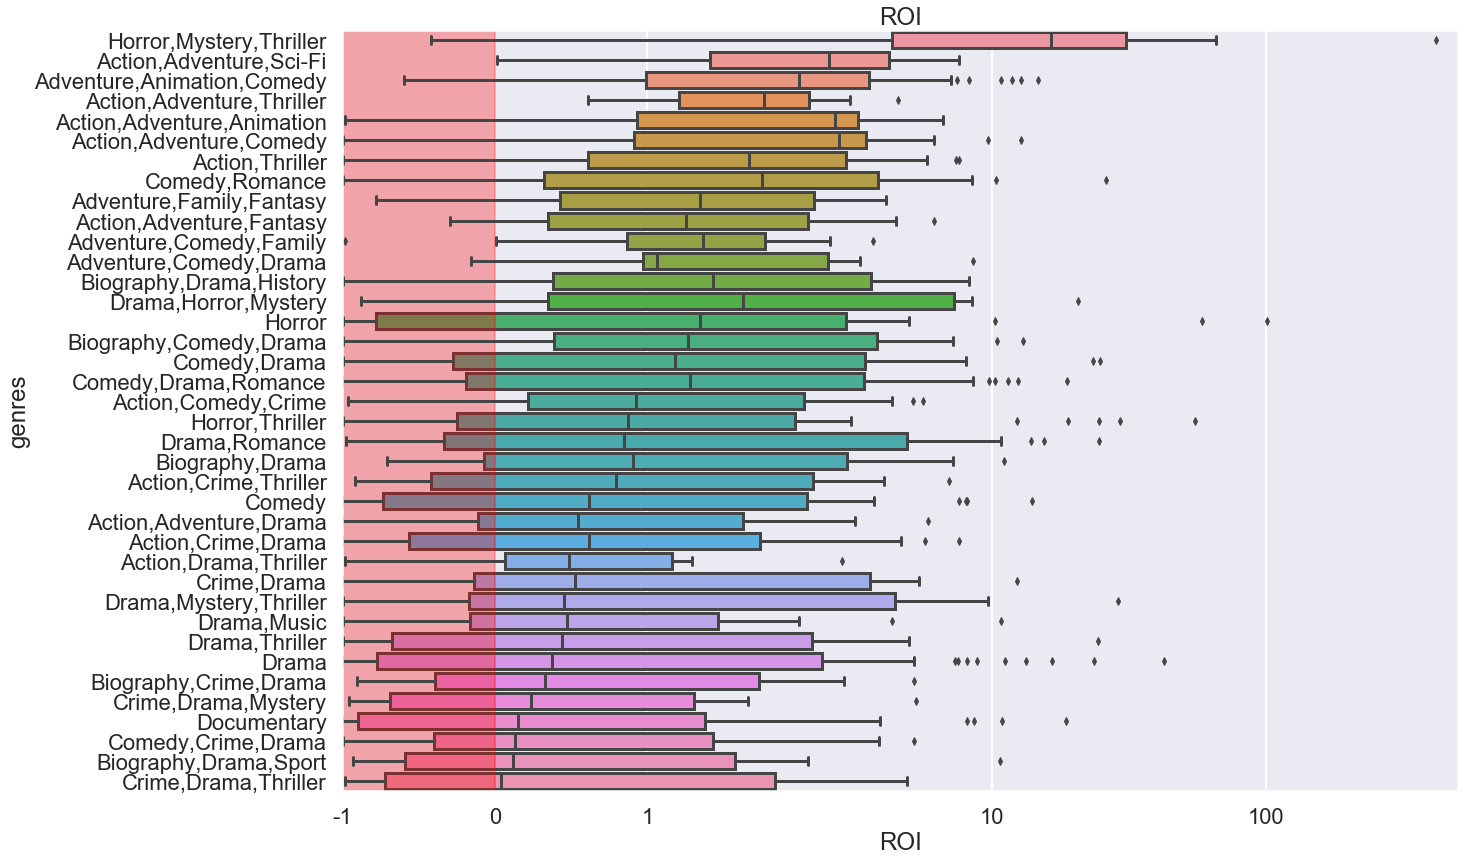

In [36]:
# Plot the box plot
sns.set_context("poster") # Make it presentable in notebook
ax = sns.boxplot(data = bigsample_movies, y='genres', x='roi', order=ranked_genres) # makes the boxplot
ax.set(xscale='symlog') # allows for negative values on log scale
ax.set_xlabel("ROI") # label
rect = Rectangle((-5,-1), 5, 100, color='red', alpha=.3) # creates rectangle that signifies loss of money
ax.add_patch(rect) # adds the rectangle
rcParams['figure.figsize'] = 14, 14 # controls figure size
ax.set(xlim=(-1,500))
plt.xticks(ticks=[-1,0,1,10,100],labels=['-1','0','1','10','100'])
rcParams['figure.figsize'] = 14, 14

# Puts the x axis on the top and bottom
#plt.rcParams['xtick.bottom'] = True
#plt.rcParams['xtick.top'] = True

ax.set_title('ROI')
plt.show()

# Figure 1

Above are the boxplots for all the movie genres in our database plotted with respect to ROI. The red rectangle signifies loss of money and movies found in that region are considered to be underperforming. For instance, more than half of all the movies made for the Thriller genre lost money.  The smallest ROI is -1 indicating that the film made no money and lost all of its budget.  An ROI of 0 means that the film broke even.  An ROI of 1 means that revenue was double the budget.  The sky is the limit.  The largest ROI outlier was for the movie _The Gallows_ in the Horror, Mystery, Thriller category with value above 400.

You might be wondering why we didn't just bin movie genres. For example, is there really a difference between a Drama, Mystery, Thriller and a Horror, Mystery, Thriller? We decided yes; if only to provide some nuance to the genre you are considering. This gives greater information about what might or might not work in the Mystery, Thriller category even if some distinctions can be slightly ambiguous. 

Some of these plots are clearly performing better than others but for others, it is difficult to tell. To really see which genres are in the top 5, we used the benefit-to-risk ratio.

In [37]:
# Get a list of top 5 genres
top5_genres = ranked_genres[:5]
top5_genres

i_top = []
for i, element in enumerate(bigsample_movies['genres']):
    if element in top5_genres:
        i_top.append(i)

top5_df = bigsample_movies.iloc[i_top, :]
top5_df

,id,release_date,production_budget,domestic_gross,worldwide_gross,roi,tconst,start_year,runtime_minutes,genres
title,,,,,,,,,,
Alvin and the Chipmunks: Chipwrecked,49,"Dec 16, 2011",80000000,133107389,349088523,3.363607,tt1615918,2011,87.0,"Adventure,Animation,Comedy"
Alvin and the Chipmunks: The Road Chip,56,"Dec 18, 2015",90000000,85886987,249517956,1.772422,tt2974918,2015,92.0,"Adventure,Animation,Comedy"
Annabelle,84,"Oct 3, 2014",6500000,84273813,256862920,38.517372,tt3322940,2014,99.0,"Horror,Mystery,Thriller"
Annabelle: Creation,2,"Aug 11, 2017",15000000,102092201,305384865,19.358991,tt5140878,2017,109.0,"Horror,Mystery,Thriller"
Arthur Christmas,14,"Nov 23, 2011",85000000,46462469,149717124,0.761378,tt1430607,2011,97.0,"Adventure,Animation,Comedy"
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963,3.243841,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,5.827114,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi"
Battleship,32,"May 18, 2012",220000000,65233400,313477717,0.424899,tt1440129,2012,131.0,"Action,Adventure,Sci-Fi"
Big Hero 6,29,"Nov 7, 2014",165000000,222527828,652127828,2.952290,tt2245084,2014,102.0,"Action,Adventure,Animation"


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


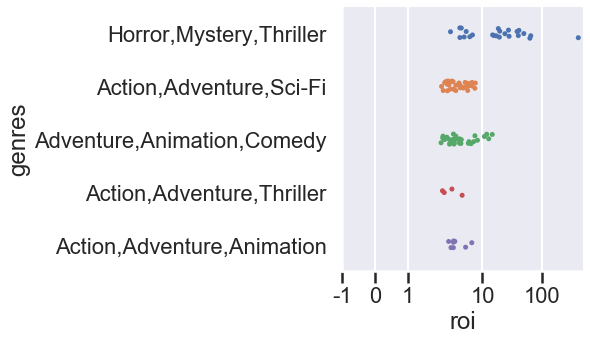

In [82]:
fg = sns.catplot(data = top5_df, y='genres', x='roi', order=ranked_genres[0:5])
fg.set(xscale='symlog')
#fg.set_xlabel("ROI")
#fg.set_ylabel('Top 5 Benefit-to-Risk Genres')
#rect = Rectangle((-5,-1), 5, 100, color='red', alpha=.3)
#ax.add_patch(rect)
fg.set(xlim=(-1,500))
plt.xticks(ticks=[-1,0,1,10,100],labels=['-1','0','1','10','100'])
rcParams['figure.figsize'] = 14, 14

plt.show()

# Figure 2

Figure 2 shows the distribution of ROI for movies in the five highest ranked genres.  Each dot on the figure corresponds to a different movie.

In [51]:
# Preparing to plot roi vs budget by genre
horror_df = movies_df[movies_df['genres'] == 'Horror,Mystery,Thriller']

In [52]:
#Action,Adventure,Sci-Fi = AASF 
AASF_df = movies_df[movies_df['genres'] == 'Action,Adventure,Sci-Fi']

In [53]:
# Adventure,Animation,Comedy = AAC
AAC_df = movies_df[movies_df['genres'] == 'Adventure,Animation,Comedy']

In [54]:
# Comedy,Romance 
CR_df = movies_df[movies_df['genres'] == 'Comedy,Romance']

In [55]:
# Comedy,Drama,Romance
CDR_df = movies_df[movies_df['genres'] == 'Comedy,Drama,Romance']

Text(0, 0.5, 'Return On Investment (ROI)')

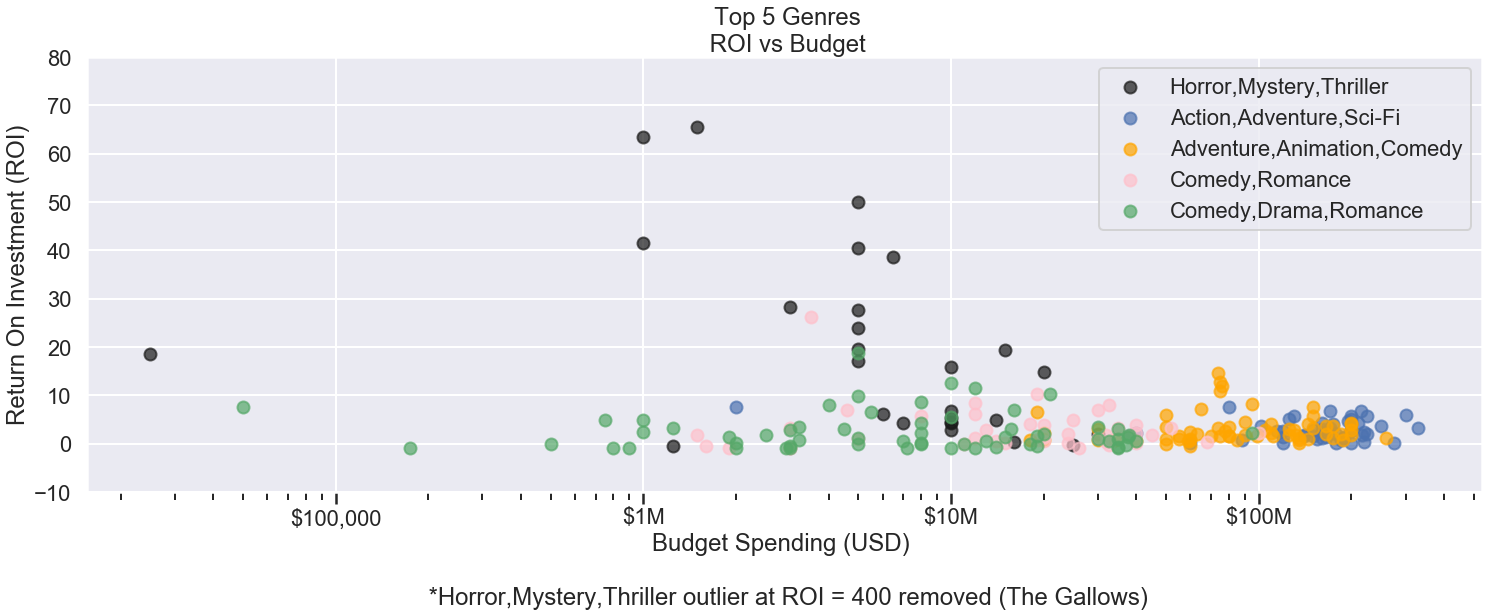

In [81]:
plt.figure(0)
plt.scatter(x = horror_df['production_budget'], y=horror_df['roi'], color = 'k', label = 'Horror,Mystery,Thriller', alpha=0.7)
plt.scatter(x=AASF_df['production_budget'], y=AASF_df['roi'], color ='b', label = 'Action,Adventure,Sci-Fi',alpha = 0.7)
plt.scatter(x=AAC_df['production_budget'], y=AAC_df['roi'], color='orange', label = 'Adventure,Animation,Comedy', alpha=0.7)
plt.scatter(x=CR_df['production_budget'], y=CR_df['roi'], color='pink', label = 'Comedy,Romance', alpha=0.7)
plt.scatter(x=CDR_df['production_budget'], y=CDR_df['roi'], color='g', label = 'Comedy,Drama,Romance', alpha=0.7)
plt.xscale('log')
plt.title('  Top 5 Genres \n ROI vs Budget')
plt.legend(loc='best')
rcParams['figure.figsize'] = 25, 8
plt.rcParams['xtick.top'] = False
plt.xticks([1e5, 1e6,1e7,1e8],['$100,000', '$1M', '$10M', '$100M'])
plt.ylim(-10,80)
plt.xlabel('Budget Spending (USD) \n \n *Horror,Mystery,Thriller outlier at ROI = 400 removed (The Gallows)')
plt.ylabel('Return On Investment (ROI)')

# Figure 4
Above is the ROI vs budget spent plotted for our top 5 genres. This plot gives a feel for the typical amounts of money spent producing movies in each genres as well as the distribution for the return one might expect based on the median. Based on this analysis, a ballpark estimate of the amount with which we should provide funding for each movie genre as well an expected return on investment is summarized in the table below. These results are the median of each distribution in figure 4.

In [62]:
#horror_budget_mean = str(round(horror_df['production_budget'].mean()/1e6,1)) +'M'
horror_budget_median = str(round(horror_df['production_budget'].median()/1e6,1))+'M'
#horror_roi_mean = round(horror_df['roi'].mean(),1)
horror_roi_median = round(horror_df['roi'].median(),1)
#AASF_df
#AASF_budget_mean = str(round(AASF_df['production_budget'].mean()/1e6,1))+'M'
AASF_budget_median = str(round(AASF_df['production_budget'].median()/1e6,1))+'M'
AASF_roi_mean = round(AASF_df['roi'].mean())
AASF_roi_median = round(AASF_df['roi'].median())
#AAC_df
AAC_budget_mean = str(round(AAC_df['production_budget'].mean()/1e6,1))+'M'
AAC_budget_median = str(round(AAC_df['production_budget'].median()/1e6,1))+'M'
AAC_roi_mean = round(AAC_df['roi'].mean(),1)
AAC_roi_median = round(AAC_df['roi'].median(),1)
#CR_df
CR_budget_mean = str(round(CR_df['production_budget'].mean()/1e6,1))+'M'
CR_budget_median = str(round(CR_df['production_budget'].median()/1e6,1))+'M'
CR_roi_mean = round(CR_df['roi'].mean(),1)
CR_roi_median = round(CR_df['roi'].median(),1)
#CDR_df
CDR_budget_mean = str(round(CDR_df['production_budget'].mean()/1e6,1))+'M'
CDR_budget_median = str(round(CDR_df['production_budget'].median()/1e6,1))+'M'
CDR_roi_mean = round(CDR_df['roi'].mean(),1)
CDR_roi_median = round(CDR_df['roi'].median(),1)





![](table.png)